In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

seed = 33

In [2]:
df_train = pd.read_csv('../input/feedback-prize-effectiveness/train.csv')

In [3]:
df_train

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
...,...,...,...,...,...
36760,9f63b687e76a,FFA381E58FC6,For many people they don't like only asking on...,Claim,Adequate
36761,9d5bd7d86212,FFA381E58FC6,also people have different views and opinions ...,Claim,Adequate
36762,f1b78becd573,FFA381E58FC6,Advice is something that can impact a persons ...,Position,Adequate
36763,cc184624ca8e,FFA381E58FC6,someone can use everything that many people sa...,Evidence,Ineffective


## Eda

In [4]:
df_train.isna().value_counts()

discourse_id  essay_id  discourse_text  discourse_type  discourse_effectiveness
False         False     False           False           False                      36765
dtype: int64

There are no missing values in dataset

In [5]:
print(f"There are {len(pd.unique(df_train['essay_id']))} essays")

There are 4191 essays


In [6]:
df_train['discourse_type'].value_counts()

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64

There are 7 types of discourses:

- **Lead** - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis
- **Position** - an opinion or conclusion on the main question
- **Claim** - a claim that supports the position
- **Counterclaim** - a claim that refutes another claim or gives an opposing reason to the position
- **Rebuttal** - a claim that refutes a counterclaim
- **Evidence** - ideas or examples that support claims, counterclaims, or rebuttals.
- **Concluding Statement** - a concluding statement that restates the claims


In [7]:
df_train['discourse_effectiveness'].value_counts()

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

In [8]:
df_train['full_text'] = df_train['discourse_text'].groupby(df_train['essay_id']).transform(lambda x: ' '.join(x))

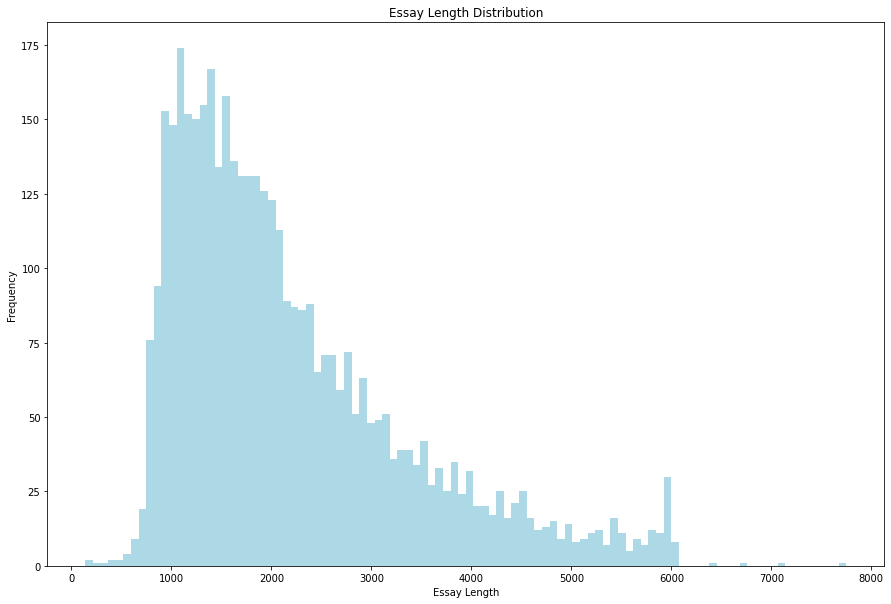

In [9]:
figsize = (15, 10)

fig = plt.figure(figsize=figsize)
text_length = df_train['full_text'].drop_duplicates().apply(len)
text_length.plot(kind='hist', color = "lightblue", bins=100)
plt.title('Essay Length Distribution')
plt.xlabel("Essay Length")
plt.ylabel("Frequency");

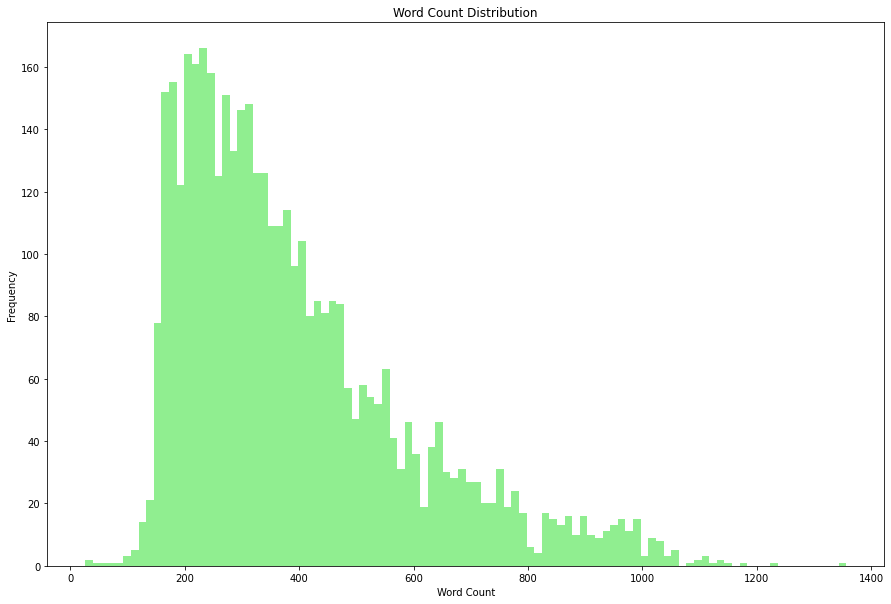

In [10]:
fig = plt.figure(figsize=figsize)
word_count = df_train['full_text'].drop_duplicates().apply(lambda x: len(str(x).split()))
ax1 = word_count.plot(kind='hist', color = "lightgreen", bins=100)
ax1.set_title('Word Count Distribution')
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Frequency");

# WordClouds

In [11]:
df_effective = df_train[df_train['discourse_effectiveness']=='Effective']
df_adequate = df_train[df_train['discourse_effectiveness']=='Adequate']
df_ineffective = df_train[df_train['discourse_effectiveness']=='Ineffective']

In [12]:
effective = text = ''.join(discourse for discourse in df_effective.discourse_text)
adequate = text = ''.join(discourse for discourse in df_adequate.discourse_text)
ineffective = text = ''.join(discourse for discourse in df_ineffective.discourse_text)

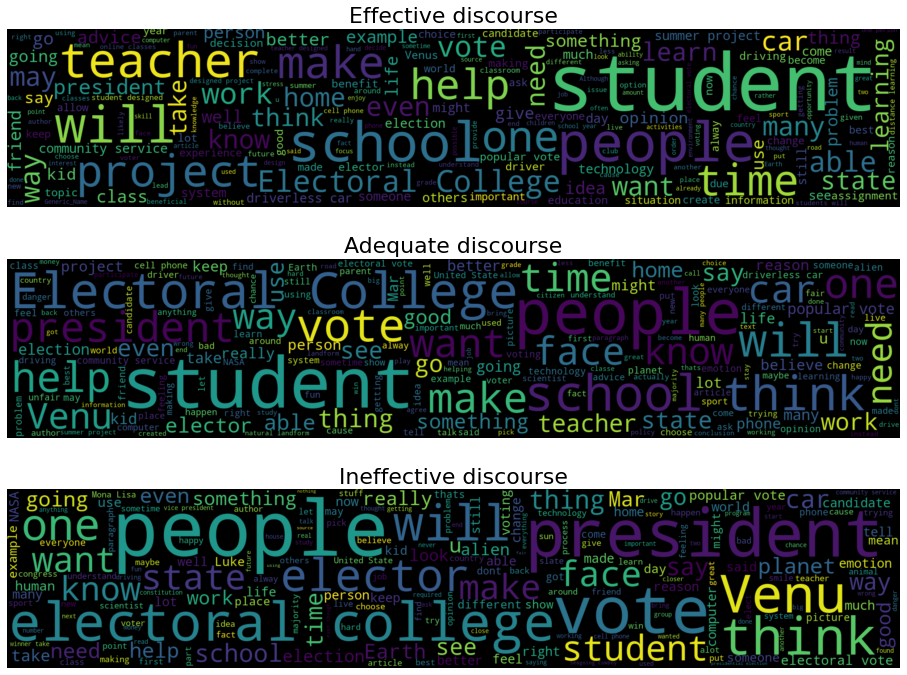

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

axes[0].imshow(WordCloud(width=2000, height=400).generate(effective), interpolation='bilinear')
axes[0].set_title('Effective discourse', fontsize=22)

axes[1].imshow(WordCloud(width=2000, height=400).generate(adequate), interpolation='bilinear')
axes[1].set_title('Adequate discourse', fontsize=22)

axes[2].imshow(WordCloud(width=2000, height=400).generate(ineffective), interpolation='bilinear')
axes[2].set_title('Ineffective discourse', fontsize=22)

# Turn off axes
for ax in axes:
    ax.axis("off")

plt.axis('off')
plt.show()